In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import dynadojo as dd
import numpy as np


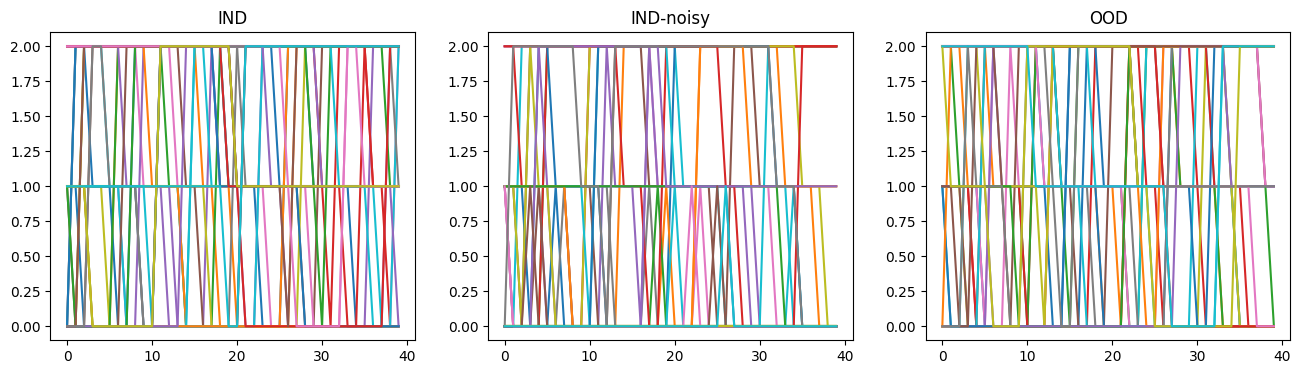

In [26]:
# SEIS model, where we can see that there are large cycles as agents become reinfected
# Here we plot each agent's trajectory and below we plot them as grouped by status
latent_dim = [40]
embed_dim = 40
n = 1
timesteps = 40
for dim in latent_dim:
    system = dd.systems.epidemic.SEISSystem(dim, embed_dim, p_recovery=0.1, noise_scale=0.1)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

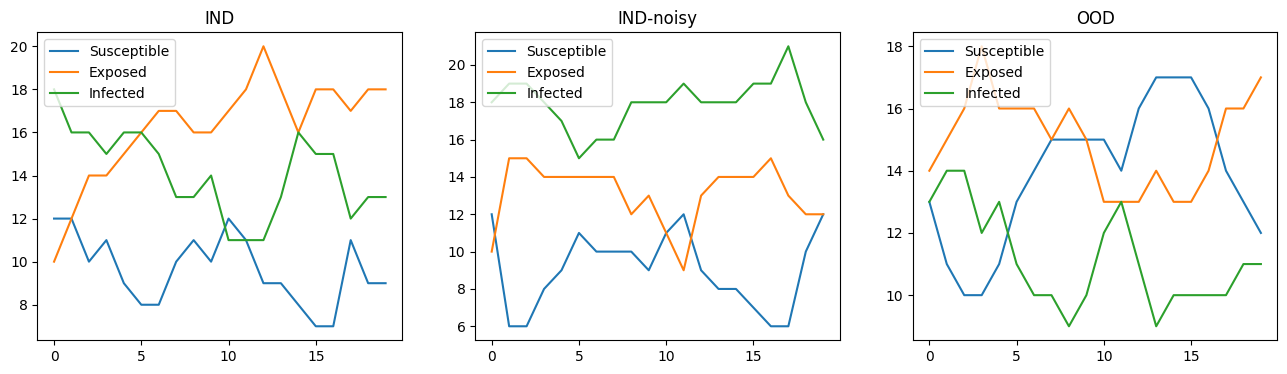

In [33]:
# SEIS model, where we plot the trajectories by their status group
latent_dim = [40]
embed_dim = 3 #Note: embdedded now is the number of groups
n = 1
timesteps = 20
for dim in latent_dim:
    system = dd.systems.epidemic.SEISSystem(dim, embed_dim, p_recovery=0.05, noise_scale=0.1, group_status=True)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, datalabels=["Susceptible", "Exposed", "Infected"], gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

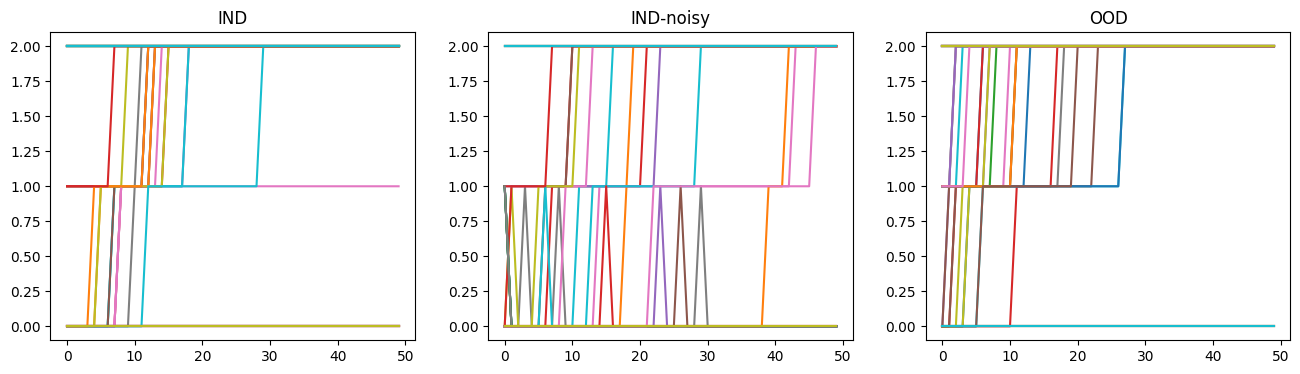

In [27]:
# SIR model, where we can see that over time most agents are "Removed" at value 2. 
# Note interesting how noise allows for those Infected to seemingly seem recovered, when that interaction pattern is not possible
latent_dim = [40]
embed_dim = 40
n = 1
timesteps = 50
for dim in latent_dim:
    system = dd.systems.epidemic.SIRSystem(dim, embed_dim, p_removal=0.1, noise_scale=0.1)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)

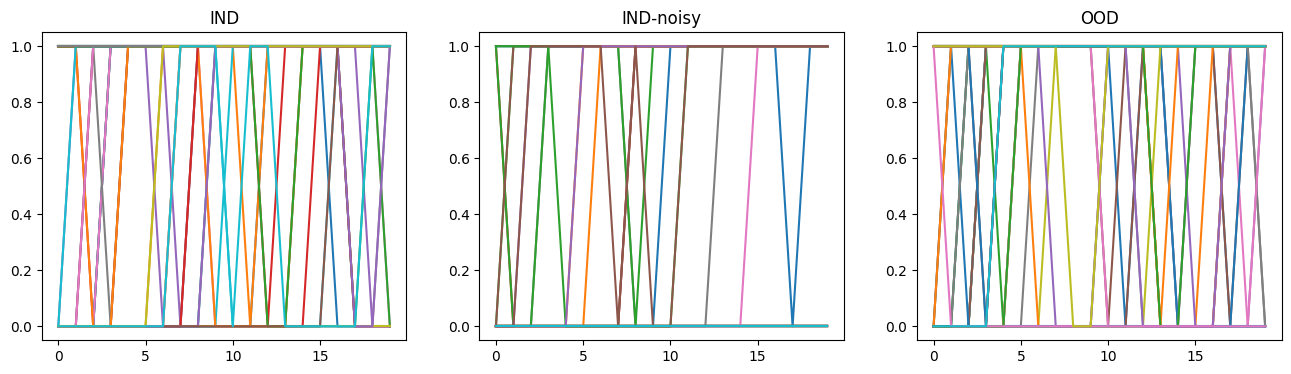

In [28]:
# SIS model, where we can see quick cycles of agents recovering
latent_dim = [40]
embed_dim = 40
n = 1
timesteps = 20
for dim in latent_dim:
    system = dd.systems.epidemic.SISSystem(dim, embed_dim, p_recovery=0.05, noise_scale=0.1)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, control=None, noisy=True)
    y = system.make_data(y0, timesteps=timesteps, control=None)

    dd.utils.opinion.plot([x, x_noisy, y], target_dim=2, gridlabels=["IND", "IND-noisy", "OOD"], max_lines=100)